In [1]:
import os
import snpy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'
plt.rcParams["font.family"] = "Gentium"
plt.rcParams['mathtext.fontset'] = "cm"

print(f'SNooPy version: v{snpy.__version__}')
DATA_DIR = 'csp_data'

SNooPy version: v2.6.0


In [2]:
max_df = pd.read_csv(f'reference_results_max_model.csv')
ebv_df = pd.read_csv(f'reference_results_EBV_model2.csv')

max_df = max_df[max_df.name.isin(ebv_df.name)].sort_values('name')
ebv_df = ebv_df[ebv_df.name.isin(max_df.name)].sort_values('name')
print(ebv_df.columns)

Index(['name', 'z', 'Tmax_gr', 'Tmax_err_gr', 'Tmax_grJH', 'Tmax_err_grJH',
       'Tmax_AllminusuB', 'Tmax_err_AllminusuB', 'Tmax_AllBands',
       'Tmax_err_AllBands', 'st_gr', 'st_err_gr', 'st_grJH', 'st_err_grJH',
       'st_AllminusuB', 'st_err_AllminusuB', 'st_AllBands', 'st_err_AllBands',
       'gmax_gp', 'gmax_err_gp', 'gmax_gr', 'gmax_err_gr', 'gmax_grJH',
       'gmax_err_grJH', 'gmax_AllminusuB', 'gmax_err_AllminusuB',
       'gmax_AllBands', 'gmax_err_AllBands', 'rmax_gp', 'rmax_err_gp',
       'rmax_gr', 'rmax_err_gr', 'rmax_grJH', 'rmax_err_grJH',
       'rmax_AllminusuB', 'rmax_err_AllminusuB', 'rmax_AllBands',
       'rmax_err_AllBands', 'Hmax_gp', 'Hmax_err_gp', 'Hmax_grJH',
       'Hmax_err_grJH', 'Hmax_AllminusuB', 'Hmax_err_AllminusuB',
       'Hmax_AllBands', 'Hmax_err_AllBands', 'Jmax_gp', 'Jmax_err_gp',
       'Jmax_grJH', 'Jmax_err_grJH', 'Jmax_AllminusuB', 'Jmax_err_AllminusuB',
       'Jmax_AllBands', 'Jmax_err_AllBands'],
      dtype='object')


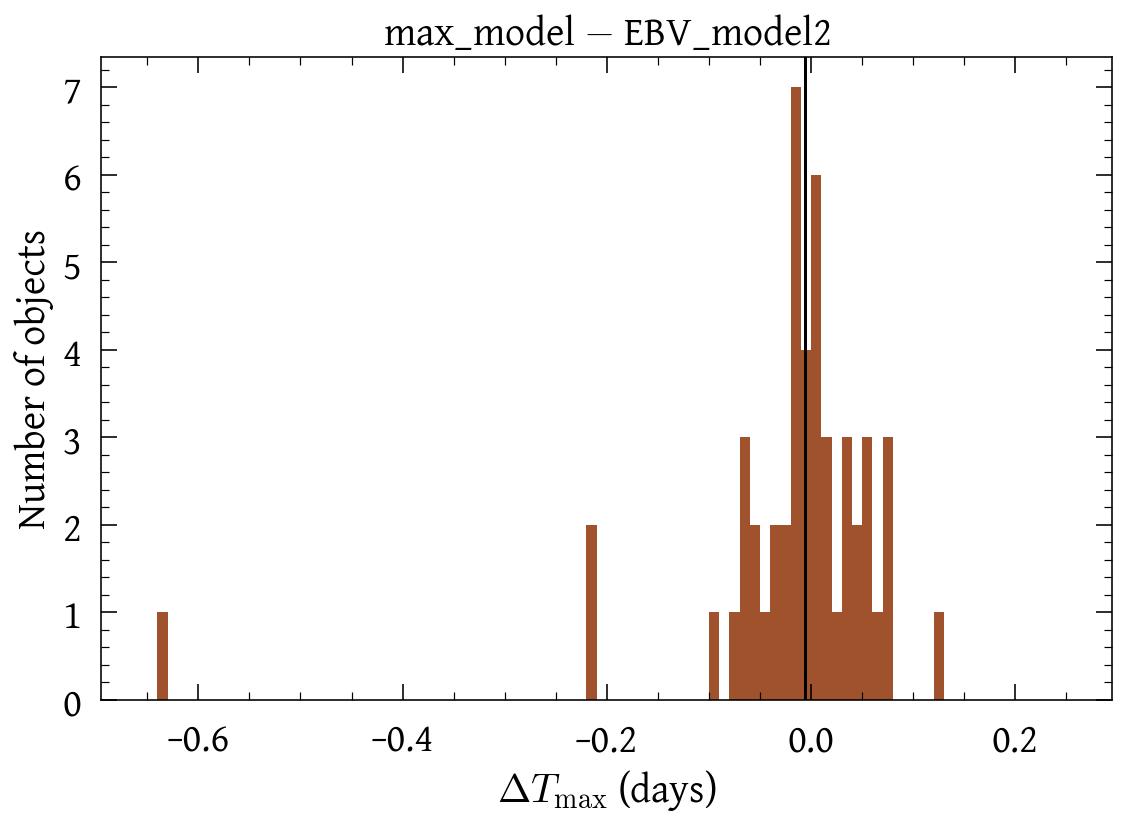

-0.00628475215535218 0.000481579056460541


In [3]:
bands = 'AllBands'
param = 'Tmax'

x = max_df[param+'_'+bands].values
y = ebv_df[param+'_'+bands].values - x
xerr = max_df[param+'_err_'+bands].values
yerr = ebv_df[param+'_err_'+bands].values
err = np.sqrt(xerr**2+yerr**2)

fig, ax = plt.subplots(figsize=(8, 6))

bins = np.arange(-0.65, 0.26, 0.01)
ax.hist(y, bins, color='sienna')
#ax.axvline(0, color='k', ls='--')

mean_val = np.mean(y[np.abs(y)<0.4])
wmean_val = np.average(y[np.abs(y)<0.4], weights=1/(err[np.abs(y)<0.4])**2)
ax.axvline(mean_val, color='k')

ax.set_xlabel(r'$\Delta T_{\rm max}$ (days)', fontsize=20)
ax.set_ylabel('Number of objects', fontsize=20)
ax.set_title(r'max_model $-$ EBV_model2', fontsize=20)
ax.tick_params(labelsize=20)

fig.tight_layout()
#plt.savefig('paper_plots/model_comparison_Tmax.pdf')
plt.show()

print(mean_val, wmean_val)

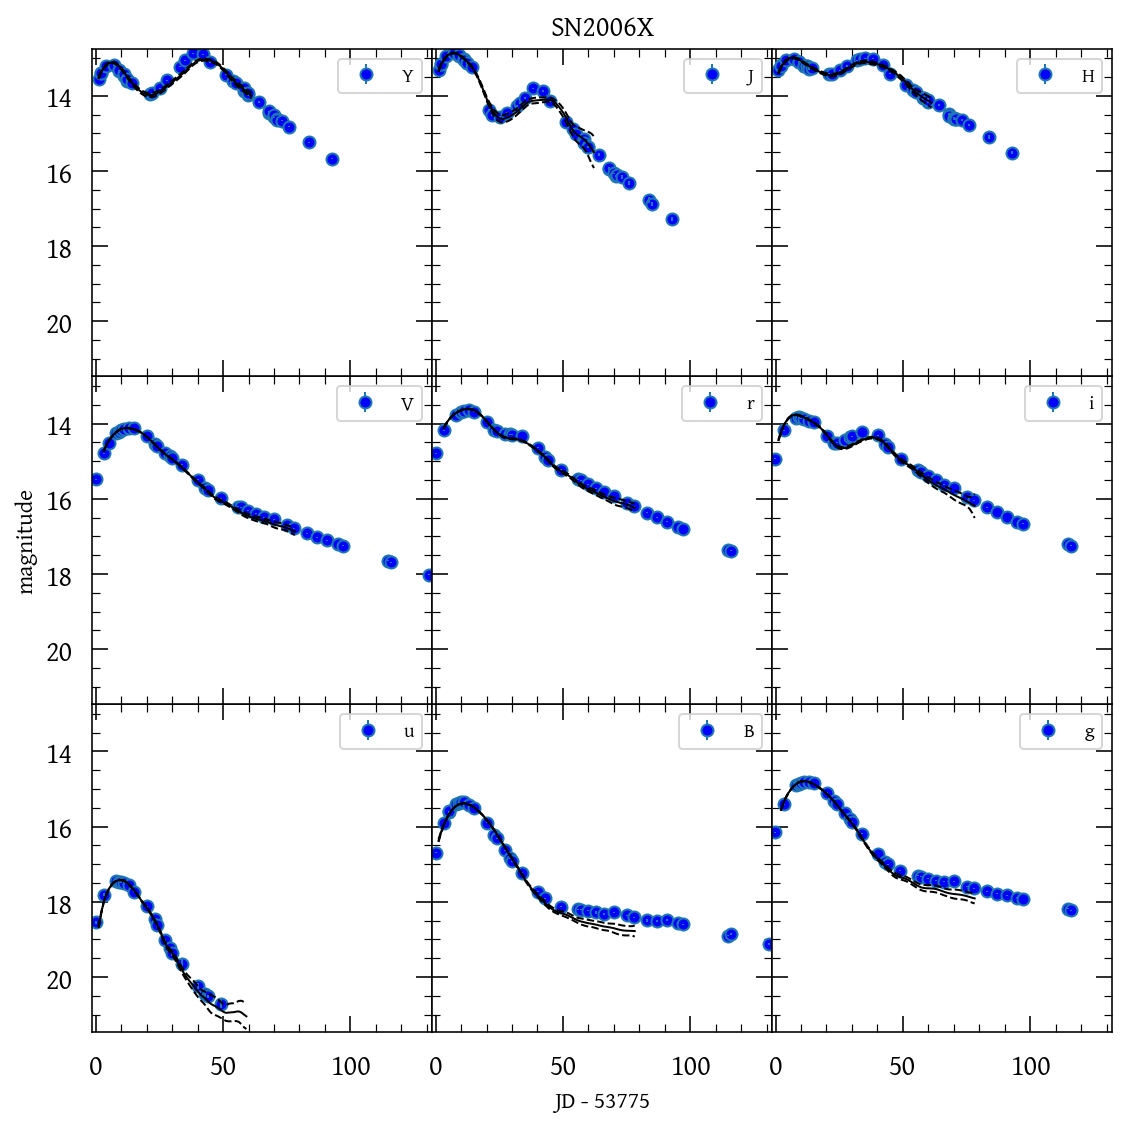

In [4]:
sn_name = max_df[y<-0.4].name.values[0]
sn_file = os.path.join(DATA_DIR, f'{sn_name}_snpy.txt')
sn = snpy.import_lc(sn_file)
sn.data.pop('K')        
    
sn.choose_model('max_model')
sn.fit()

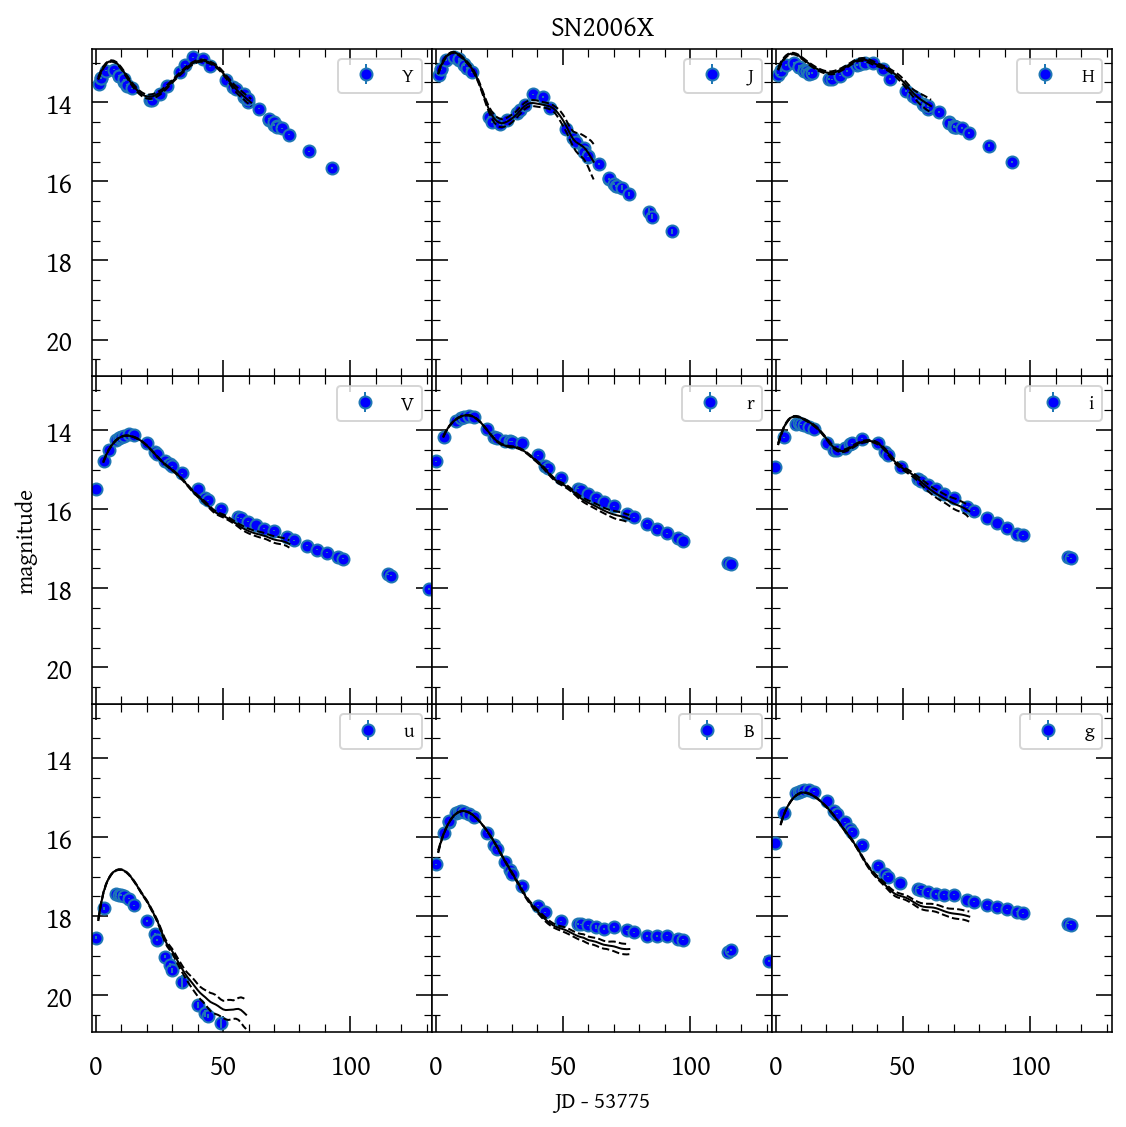

In [5]:
sn_name = max_df[y<-0.4].name.values[0]
sn_file = os.path.join(DATA_DIR, f'{sn_name}_snpy.txt')
sn = snpy.import_lc(sn_file)
sn.data.pop('K')   

sn.choose_model('EBV_model2')
sn.fit()

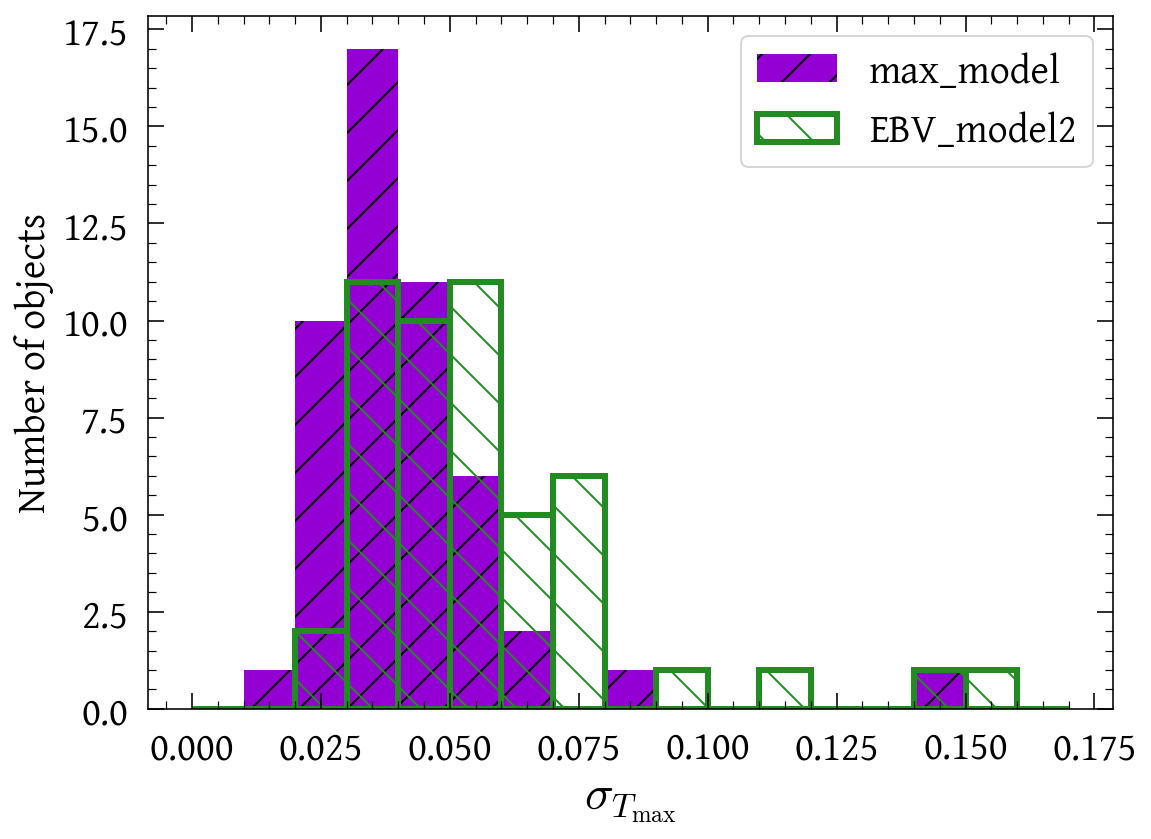

In [6]:
fig, ax = plt.subplots(figsize=(8, 6))

bins = np.arange(0, 0.18, 0.01)
ax.hist(xerr, bins, label='max_model', hatch='/', color='darkviolet', fill=True, lw=3)
ax.hist(yerr, bins, label='EBV_model2', hatch='\\', edgecolor='forestgreen', fill=False, lw=3)

ax.set_xlabel(r'$\sigma_{T_{\rm max}}$', fontsize=24)
ax.set_ylabel('Number of objects', fontsize=20)
ax.tick_params(labelsize=20)
#ax.set_xlim(0.01, 0.15)
ax.legend(fontsize=20)

fig.tight_layout()
#plt.savefig('paper_plots/model_comparison_Tmax_err.pdf')
plt.show()